In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv(r"C:\Users\mosae\Desktop\USD\AAI 510\Module 1\home-credit-default-risk\application_train.csv")
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train.shape

(307511, 122)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Missing values

In [5]:
missingValue = train.isnull().sum()
missingPersent = 100*train.isnull().sum()/len(train)

missing_val_table = pd.concat([missingValue,missingPersent],axis=1)
missing_values_col = missing_val_table.rename(columns={0:'Missing Value',1 :"percent of value"})
missing_values_col = missing_values_col[missing_val_table.iloc[:,1]!=0].sort_values("percent of value",ascending=False).round(1)
missing_values_col

,Missing Value,percent of value
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [6]:
# droping all the columns with a missing value persantege more than 30% because using a Simpleimputer
# with the median or mean will intreduse bise 
# and because with this highe missing value persentage i can conclude that the variable
# wound not be relevant to create a predictive model

for col in train:
    if (100*train[col].isnull().sum()/len(train[col])) >= 10:
        train = train.drop(columns = col)

train.shape

(307511, 65)

In [7]:
# see the missing values after taking out the outlier
missingValue = train.isnull().sum()
missingPersent = 100*train.isnull().sum()/len(train)

missing_val_table = pd.concat([missingValue,missingPersent],axis=1)
missing_values_col = missing_val_table.rename(columns={0:'Missing Value',1 :"percent of value"})
missing_values_col = missing_values_col[missing_val_table.iloc[:,1]!=0].sort_values("percent of value",ascending=False).round(1)
missing_values_col

,Missing Value,percent of value
NAME_TYPE_SUITE,1292,0.4
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


## Encoder

In [8]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# use OrdinalEncoder to encode the data
from category_encoders import OrdinalEncoder

ordinencod = OrdinalEncoder()
ordinencod.fit(train)

train = ordinencod.transform(train)


In [10]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,1,1,1,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


## Imputer

In [11]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

result_mean_imputer = mean_imputer.fit_transform(train)

columnsList = [i for i in train]

train = pd.DataFrame(result_mean_imputer, columns=columnsList)

In [12]:
train.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64

## Ouitleir

In [13]:
train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,1.095213,1.658370,1.340108,1.306327,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.293509,0.474284,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.454517,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,2.000000,3.000000,2.000000,2.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# creating a data fream for the outlier values

newList = []

for i in train:
    if train[i].dtype!="object":
        q1 = (train[i].describe()['25%'])
        q3 = (train[i].describe()['75%'])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)
        outLier = train[i].loc[(train[i] > upper_bound) | (train[i] < lower_bound) ]
        outLierPrersentage = 100*outLier.count()/len(train)
        newList.append([i,lower_bound, upper_bound, iqr, outLier.count(), outLierPrersentage])

outlier = pd.DataFrame(newList, columns=["features", "lower_bound",
                                         "upper_bound","iqr","outlier_Count","outlierpersentage"
                                        ]).set_index('features').sort_values(
    "outlierpersentage",ascending=False).round(1).T

outlier.head()

features,TARGET,REGION_POPULATION_RELATIVE,AMT_ANNUITY,AMT_CREDIT,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_5,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE,FLAG_DOCUMENT_16,...,FLAG_PHONE,FLAG_DOCUMENT_3,DAYS_ID_PUBLISH,DAYS_BIRTH,WEEKDAY_APPR_PROCESS_START,EXT_SOURCE_2,FLAG_OWN_REALTY,FLAG_OWN_CAR,CODE_GENDER,SK_ID_CURR
lower_bound,0.0,-0.0,-10584.0,-537975.0,0.0,0.0,-1.5,0.5,-0.5,0.0,...,-1.5,-1.5,-8167.5,-30585.5,-4.0,-0.0,-0.5,-0.5,-0.5,-77850.0
upper_bound,0.0,0.1,61704.0,1616625.0,0.0,0.0,2.5,4.5,3.5,0.0,...,2.5,2.5,2148.5,-1509.5,12.0,1.1,3.5,3.5,3.5,634138.0
iqr,0.0,0.0,18072.0,538650.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,2579.0,7269.0,4.0,0.3,1.0,1.0,1.0,177997.0
outlier_Count,24825.0,8412.0,7504.0,6562.0,4657.0,4648.0,4272.0,4007.0,3980.0,3053.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
outlierpersentage,8.1,2.7,2.4,2.1,1.5,1.5,1.4,1.3,1.3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# looking at the outlier dataframe we can see that there is variable with a high outlier persentage in the datafream. 
# there for we will drob the columns with a 4% outlier since the outlier value is high i can conclude that the variable
# wound not be relevant to create a predictive model

for col in outlier:
    if col != "TARGET":
        if outlier[col]["outlierpersentage"] >= 1:
            train = train.drop(columns = col)

train.shape

(307511, 41)

## Corelations

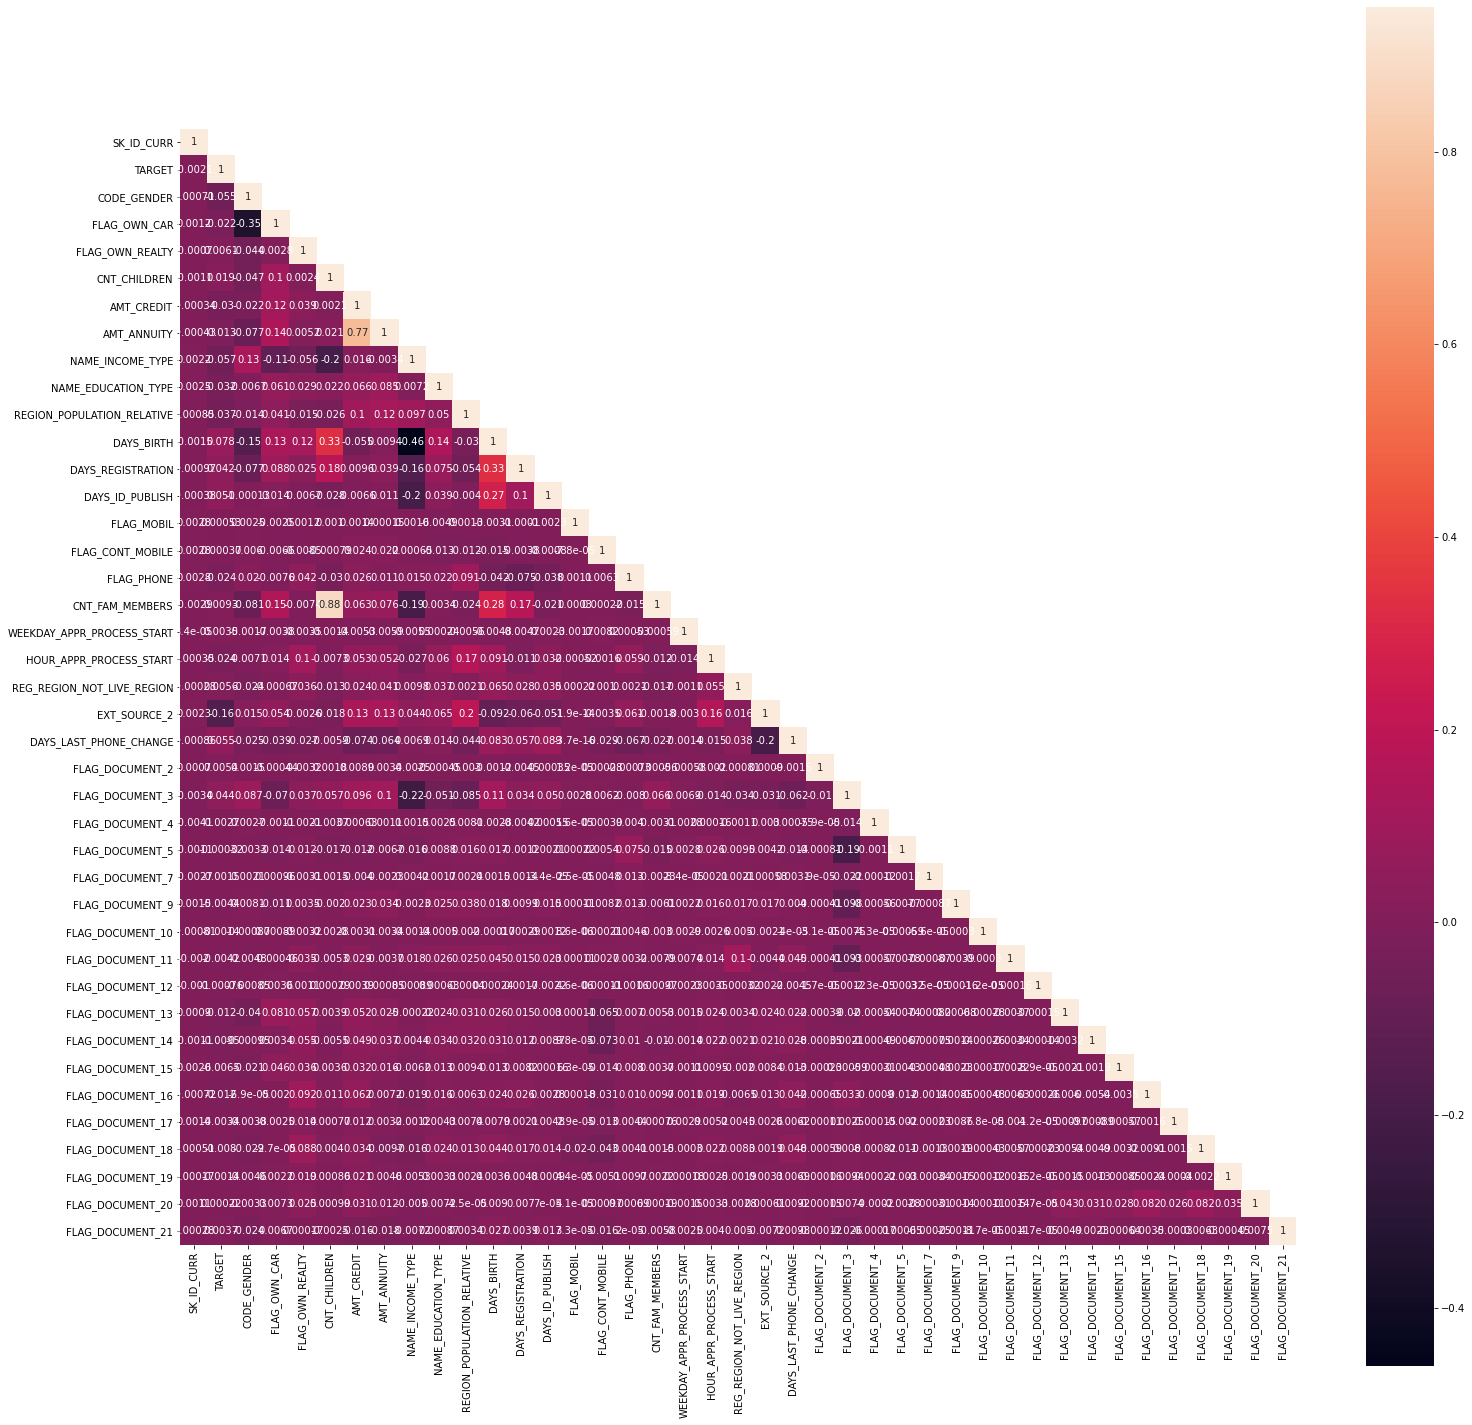

In [29]:
# One of the best places to start understanding the relationship 
# between the independent variable is the correlation between the variables.

fig, ax = plt.subplots(figsize=(25,25))
corrMatrix = train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatrix, mask=mask, vmax=.95, square=True,annot=True, ax=ax)
plt.show()

In [32]:
#Correlation with output variable
cor_target = (corrMatrix["TARGET"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.005]
relevant_features

TARGET                        1.000000
FLAG_OWN_REALTY               0.006148
CNT_CHILDREN                  0.019187
DAYS_BIRTH                    0.078239
DAYS_REGISTRATION             0.041975
DAYS_ID_PUBLISH               0.051457
CNT_FAM_MEMBERS               0.009308
REG_REGION_NOT_LIVE_REGION    0.005576
DAYS_LAST_PHONE_CHANGE        0.055218
FLAG_DOCUMENT_2               0.005417
FLAG_DOCUMENT_3               0.044346
Name: TARGET, dtype: float64

#looking at the corelation of the target feature we see that the corellation is so low. as we can see those the top-ten variables that will be most relevant to create a predictive model with is are 

***1- FLAG_OWN_REALTY
2- CNT_CHILDREN  
3- DAYS_BIRTH               
4- DAYS_REGISTRATION        
5- DAYS_ID_PUBLISH            
6- CNT_FAM_MEMBERS             
7- REG_REGION_NOT_LIVE_REGION  
8- DAYS_LAST_PHONE_CHANGE       
9- FLAG_DOCUMENT_2            
10- FLAG_DOCUMENT_3***

I deployed a Logistic Regression model to see if i am right 